# Heart Disease Classification

In [ ]:
# Importing computational packages
import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the datasets
path = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv'
dataset = pd.read_csv(path)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking for the missing value present in each columns
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

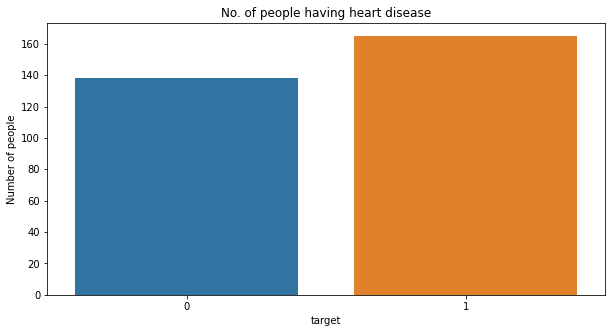

In [ ]:
# Visualization of training data

# Individual Plots - a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
sns.countplot(dataset["target"])
plt.ylabel("Number of people")
plt.title("No. of people having heart disease")
plt.show()

In [ ]:
#Observe the distribution of our classes
classes=dataset['target'].value_counts()
have = round(classes[1] / dataset['target'].count()*100,2)
d_have = round(classes[0] / dataset['target'].count()*100, 2)

have, d_have

(54.46, 45.54)

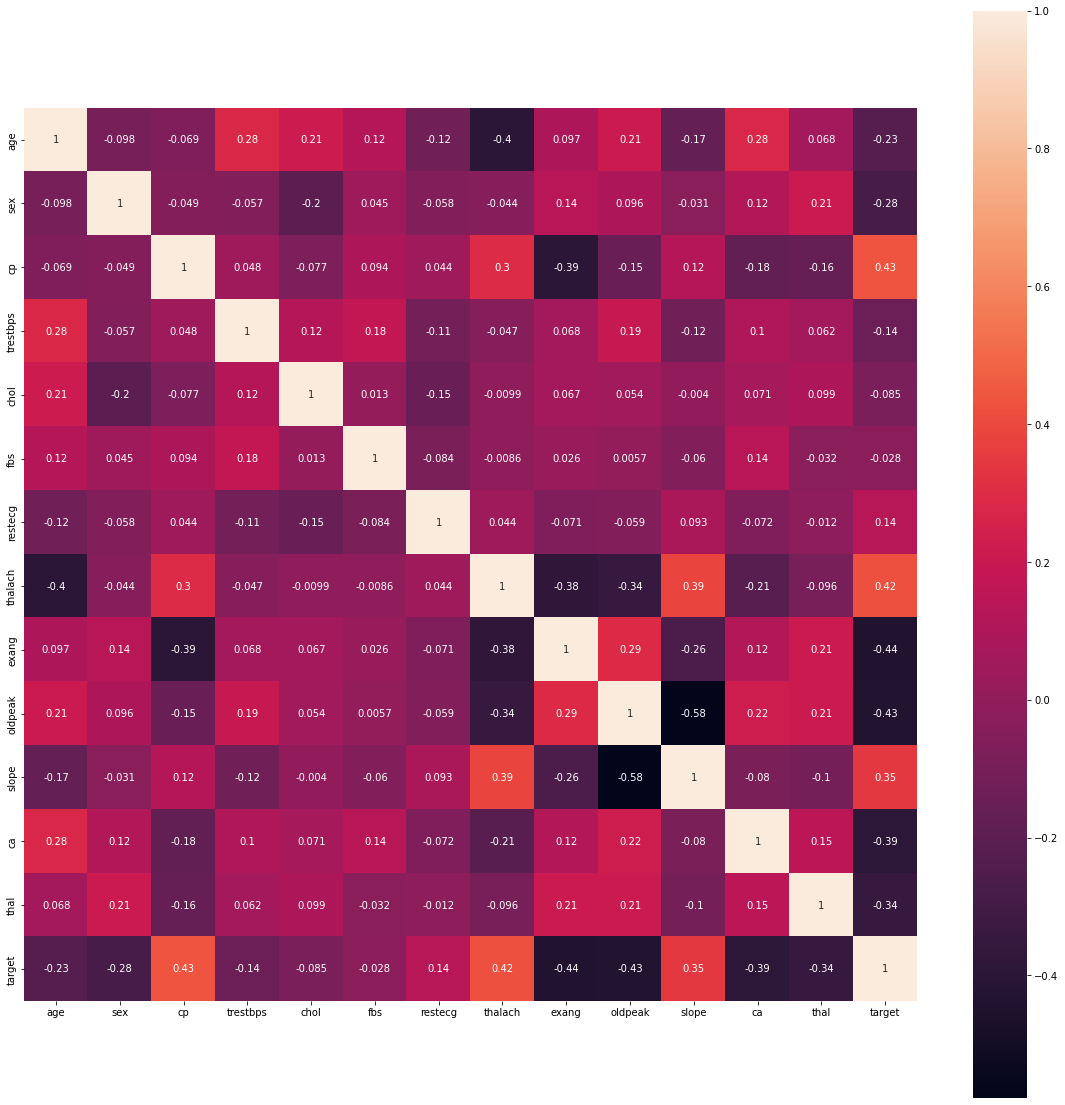

In [ ]:
# Heatmap 
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=None, square=True, ax=ax,annot=True)
plt.show()

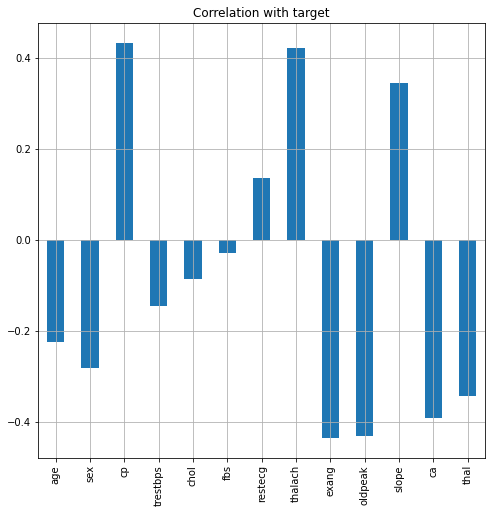

In [ ]:
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(8, 8), 
                                                            title="Correlation with target")

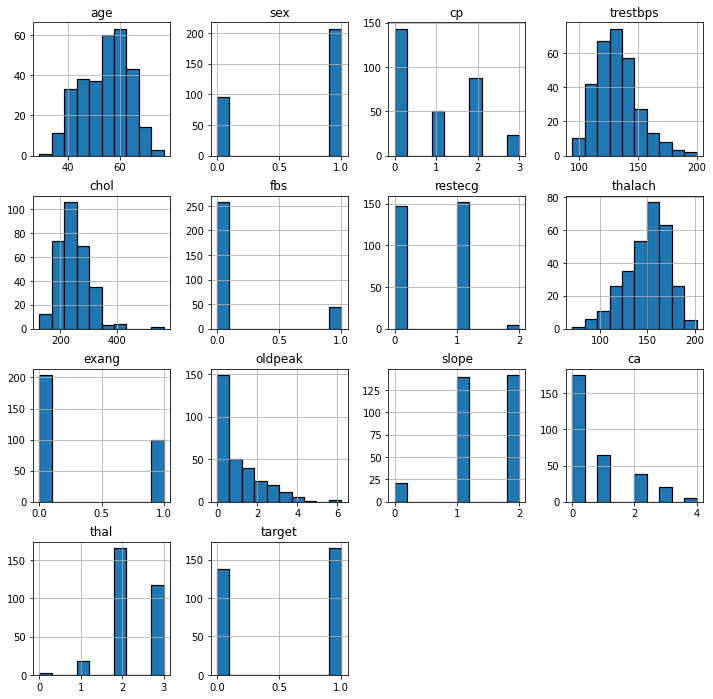

In [ ]:
# Create a histogram to observe the distribution of data and outliers
dataset.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

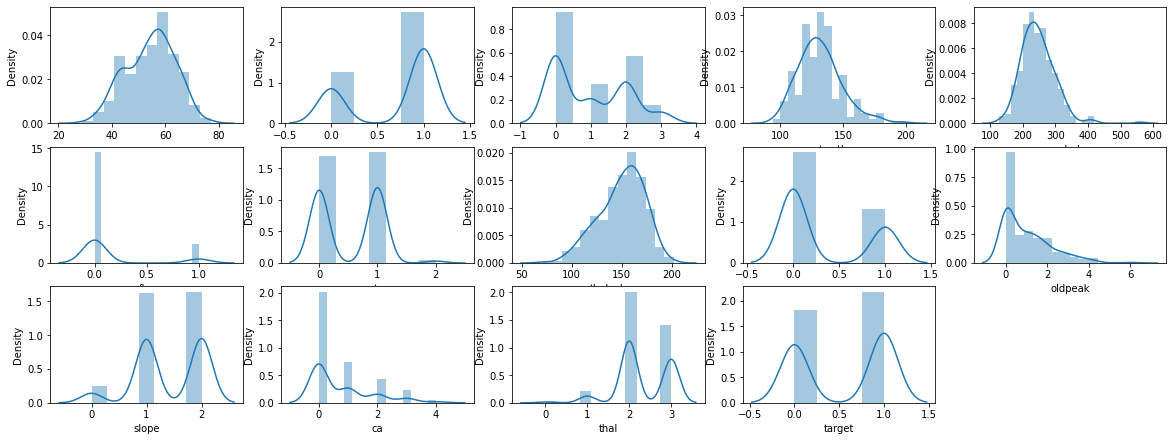

In [ ]:
var = dataset.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    sns.distplot(dataset[col])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
def draw_cm(cf_matrix) :
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

In [ ]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate error rate
    conf_error = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_error,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
X = dataset.drop('target', axis = 1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(212, 13)
(91, 13)


In [ ]:
model1 = KNeighborsClassifier(n_neighbors=5) # this examines 5 neighbors for putting the data into class
model1.fit(X_train, y_train)
prediction = model1.predict(X_test)

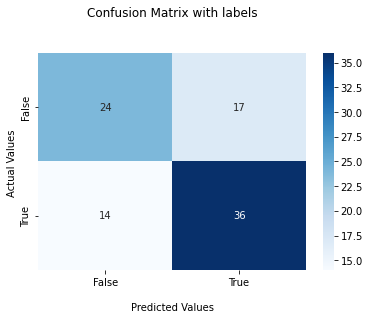

In [ ]:
cm = confusion_matrix(y_test , prediction)
knn_acc = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.66
Mis-Classification: 0.34
Sensitivity: 0.72
Specificity: 0.59
Precision: 0.59
f_1 Score: 0.65


In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
prediction = model2.predict(X_test)

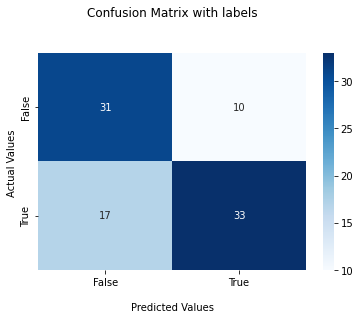

In [ ]:
cm = confusion_matrix(y_test , prediction)
decision_tree_acc = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.7
Mis-Classification: 0.3
Sensitivity: 0.66
Specificity: 0.76
Precision: 0.76
f_1 Score: 0.7


In [ ]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
prediction = model3.predict(X_test)

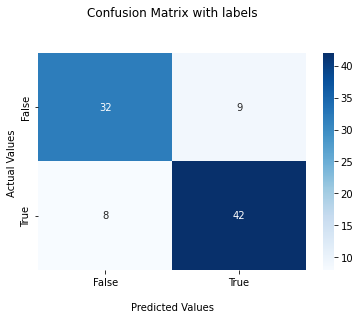

In [ ]:
cm = confusion_matrix(y_test , prediction)
logistic_reg_acc = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.84
Specificity: 0.78
Precision: 0.78
f_1 Score: 0.81


In [ ]:
model4 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model4.fit(X_train, y_train)
prediction = model4.predict(X_test)

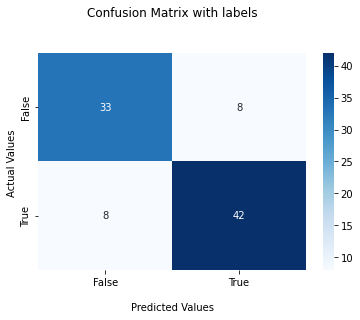

In [ ]:
cm = confusion_matrix(y_test , prediction)
svm_acc = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.84
Specificity: 0.8
Precision: 0.8
f_1 Score: 0.82


In [ ]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
prediction = model5.predict(X_test)

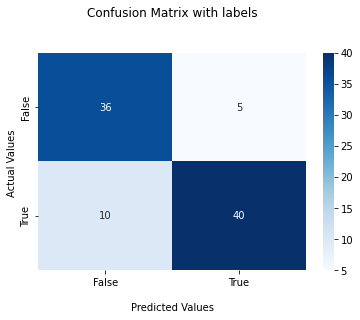

In [ ]:
cm = confusion_matrix(y_test , prediction)
naive_bayes_acc = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.8
Specificity: 0.88
Precision: 0.88
f_1 Score: 0.84


In [ ]:
model6 = RandomForestClassifier(max_depth=2, random_state=0)
model6.fit(X_train, y_train)
prediction = model6.predict(X_test)

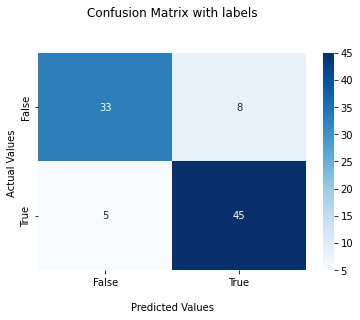

In [ ]:
cm = confusion_matrix(y_test , prediction)
random_forest_acc = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.9
Specificity: 0.8
Precision: 0.8
f_1 Score: 0.85


Text(0, 0.5, 'Accuracy')

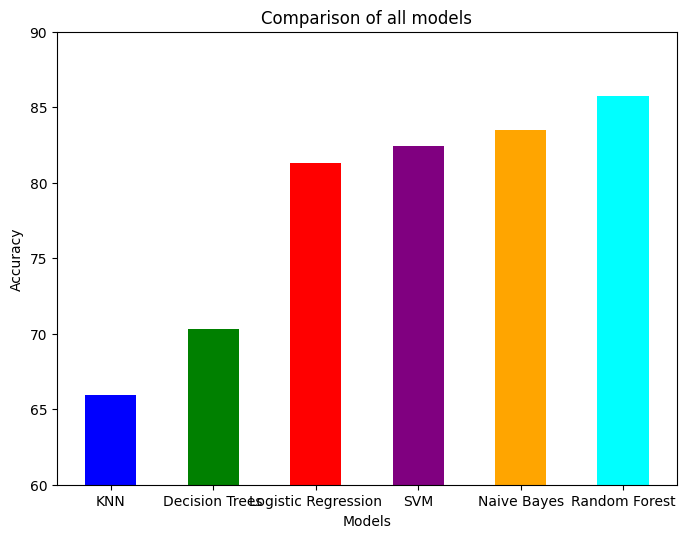

In [ ]:
#Comparison of all models
xaxis = ["KNN","Decision Trees","Logistic Regression","SVM","Naive Bayes","Random Forest"]
yaxis = [knn_acc*100, decision_tree_acc*100,logistic_reg_acc*100,svm_acc*100,naive_bayes_acc*100,random_forest_acc*100]
plt.figure(figsize=(8, 6), dpi=100)
plt.ylim(ymin=60,ymax=90)
plt.bar(xaxis,yaxis,color=['blue','green','red','purple','orange','cyan'],width=0.5)


plt.title("Comparison of all models")
plt.xlabel("Models")
plt.ylabel("Accuracy")

In [ ]:
# Voting Ensemble for Classification(stacking ensemble)
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state = 42, shuffle = True)

# create the sub models
estimators = []
estimators.append(('random_forest', model6))
estimators.append(('naive_bayes', model5))
estimators.append(('svm', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.max())

0.967741935483871
